# Twitter Sentiment Analysis

- Congrats on getting this far
- Just download your archive and put it in the same directory as this notebook file

In [1]:
#Import a lot of stuff

import os
import string
import pandas as pd
import matplotlib.pyplot as plt


from shutil import unpack_archive
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

%matplotlib inline

In [3]:
#Download all the necessary NLTK info
#Run this cell twice
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
# Unzip the archive and put it in a folder
# Just do this once
for f in os.listdir(os.curdir):
    if f.endswith('.zip'):
        unpack_archive(f, 'archive/')

In [5]:
#Read all of those tweets into a Panda Frame
raw_data = pd.read_csv('archive/tweets.csv', encoding="utf-8")
analysis = pd.DataFrame(raw_data)

#Print out in a fancy HTML table
analysis["text"]

0     RT @brockhumanities: Calling all grad students...
1     In the biz we call that Text Analysis. https:/...
2     Next up on the Digital Scholarship Lab Winter ...
3     What is one example of digital scholarship you...
4     RT @brock_library: It's true! Saturday worksho...
5     Here's what we're up to this semester. HINT: W...
6     RT @brock_dsl: It's not too late to sign up fo...
7     It's not too late to sign up for the Introduct...
8     @nomadic_ebru @BrockU_MDGL Let's get that on a...
9     We made a dataviz of our most favorite digital...
10    Did you miss our last Introduction to Command ...
11    Workshop shop talk on Episode 4. Now posted.\n...
12    How do you keep track of references and source...
13    Wondering what the Brock Digital Scholarship L...
14    It's not too late to sign up for the Zotero wo...
15    Extra! Extra! New Digital Scholarship Lab Blog...
16    Join the Brock DSL for a hands-on Software Car...
17    Our podcast is now in the triple digits. T

In [6]:
#Binary Sentiment
#Looks at all of our tweets and determines which are 'positive', 'negative', or 'neutral' based on binary classification


sid = SentimentIntensityAnalyzer()
summary = {"positive":0,"neutral":0,"negative":0}
for x in analysis["text"]:
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0:
        analysis = analysis.append({"Sent": "NEU", "Text": x},ignore_index=True)
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        analysis = analysis.append({"Sent": "POS", "Text": x},ignore_index=True)
        summary["positive"] +=1
    else:
        analysis = analysis.append({"Sent": "NEG", "Text": x},ignore_index=True)
        summary["negative"] +=1

        
print(summary)
print("Done!")

{'positive': 43, 'neutral': 41, 'negative': 2}
Done!


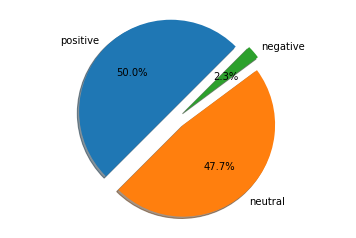

In [7]:
#Plot out that binary info into a nice pie
plt.pie([float(s) for s in summary.values()],labels=[str(l) for l in summary.keys()],autopct='%.1f%%', explode=[.1,.1,.1], shadow=True, startangle=45)
plt.axis('equal')
plt.show()